# Atividade Final 

*Grupo A*
- Jessica da Silva Bonfim
- Osvaldo Pilarte Sivuilu Ndonga
- Yago Moreira Castro

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Crie dois perfis sísmicos sintéticos, um de refração e outro de reflexão, utilizando uma cossenoide com frequência de 3 Hz e amplitude unitária, com taxa de amostragem de 0,001 segundos. Considere uma camada com espessura de 130 metros, onde a velocidade da primeira camada é de 1000 m/s e da segunda camada é de 3000 m/s. Adicione ruído aleatório ao sinal e simule os tempos de viagem das ondas refratadas e refletidas. Por fim, gere gráficos para os dois perfis.

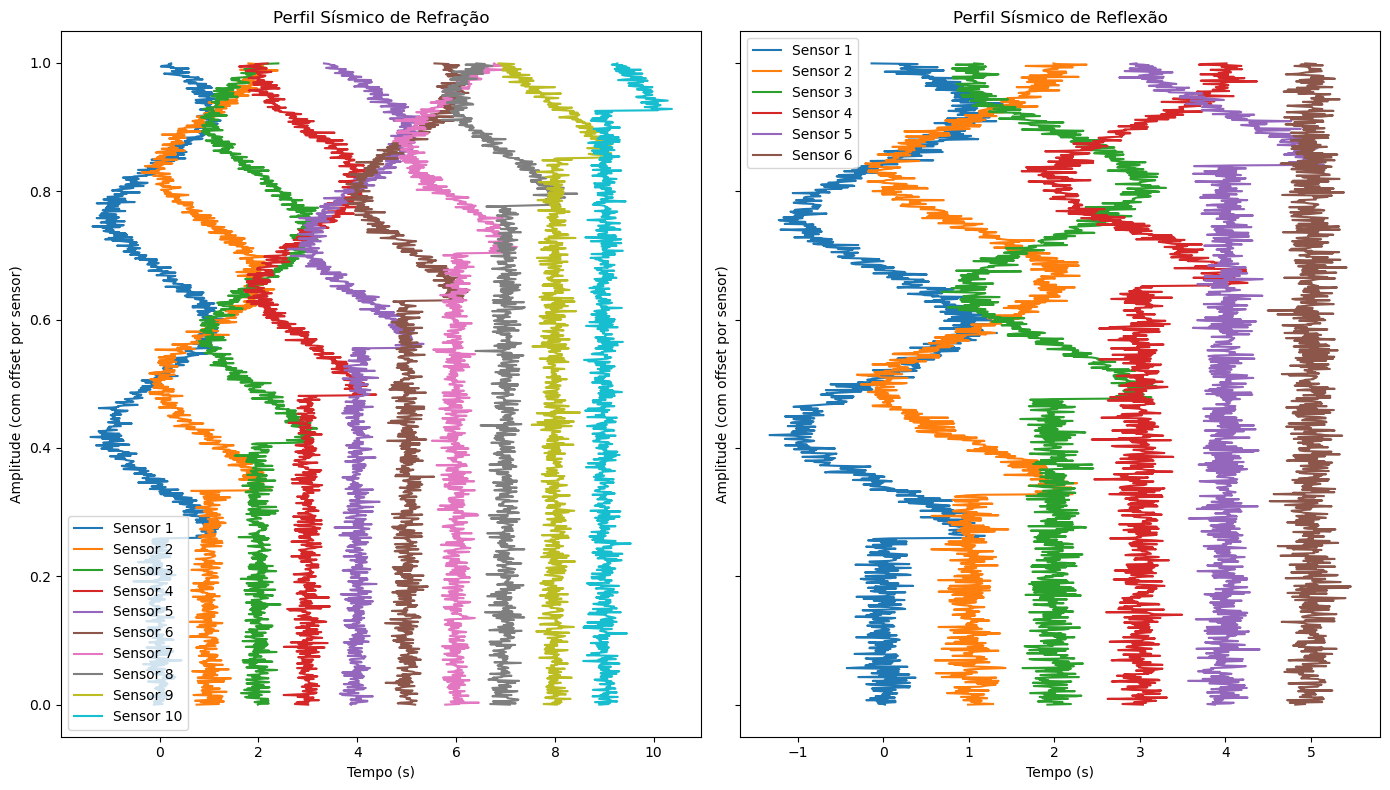

In [15]:
def criar_sinais(tempos_chegada, cos_wave, t, dt, noise_level):
    sinais = []
    for t0 in tempos_chegada:
        sinal = np.zeros_like(t)
        idx = int(t0 / dt)
        if idx < len(t):
            sinal[idx:idx+len(cos_wave)] += cos_wave[:len(sinal)-idx]
        sinal += noise_level * np.random.randn(len(t))
        sinais.append(sinal)
    return np.array(sinais)

def gerar_sinal_sismico(t, freq, amplitude):
    return amplitude * np.cos(2 * np.pi * freq * t)

def calcular_perfil_reflexao(x_reflection, h, V1):
    return np.sqrt((2 * h / V1)**2 + (x_reflection / V1)**2)

def calcular_perfil_refracao(x_refraction, h, V1, V2):
    return x_refraction / V2 + 2 * h / V1

def criar_perfil_sismico(t_percurso, signal, t, dt, noise_level):
    return criar_sinais(t_percurso, signal, t, dt, noise_level)

def plotar_perfil_sismico(refraction_profile, reflection_profile, t):
    fig, axs = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

    for i, trace in enumerate(refraction_profile):
        axs[0].plot(trace + i,t , label=f"Sensor {i+1}")
    axs[0].set_title("Perfil Sísmico de Refração")
    axs[0].set_ylabel("Amplitude (com offset por sensor)")
    axs[0].set_xlabel("Tempo (s)")
    axs[0].legend()

    for i, trace in enumerate(reflection_profile):
        axs[1].plot(trace + i,t , label=f"Sensor {i+1}")
    axs[1].set_title("Perfil Sísmico de Reflexão")
    axs[1].set_ylabel("Amplitude (com offset por sensor)")
    axs[1].set_xlabel("Tempo (s)")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

fs = 1000
dt = 1 / fs
duration = 1.0
t = np.arange(0, duration, dt)
freq = 3
h = 130
V1 = 1000
V2 = 3000
amplitude = 1.0
noise_level = 0.15

signal = gerar_sinal_sismico(t, freq, amplitude)

n_sensors_refraction = 10
x_refraction = np.linspace(0, 2000, n_sensors_refraction)
t_refraction = calcular_perfil_refracao(x_refraction, h, V1, V2)

refraction_profile = criar_perfil_sismico(t_refraction, signal, t, dt, noise_level)

n_sensors_reflection = 6
x_reflection = np.linspace(0, 1000, n_sensors_reflection)
t_reflection = calcular_perfil_reflexao(x_reflection, h, V1)

reflection_profile = criar_perfil_sismico(t_reflection, signal, t, dt, noise_level)

plotar_perfil_sismico(refraction_profile, reflection_profile, t)

Exemplifique e mostre um sinal de CMP sintético. Para um semi-espaço com camada V1 = 1500 m/s e V2=3000 m/s, com espessura de 100 m. Use somente 6 estações e sinal sem contaminação.

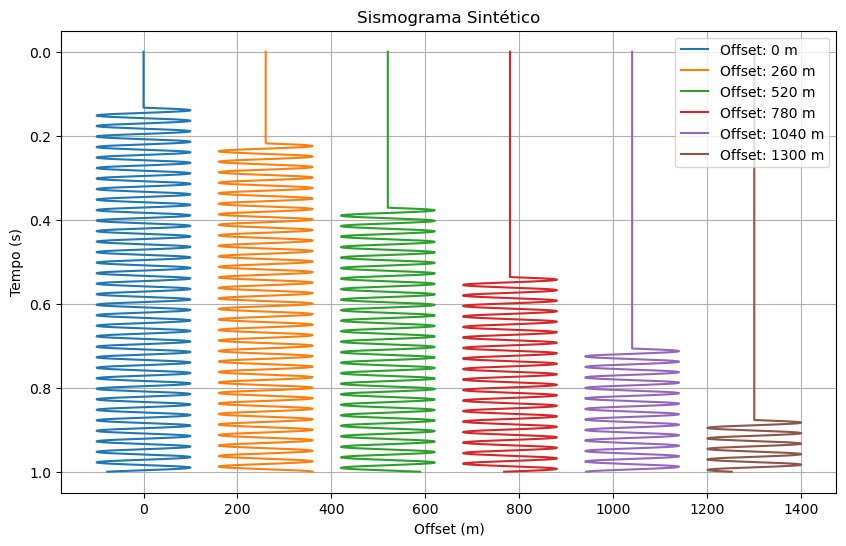

In [10]:
def calcular_tempo(offsets, tempo_inicial, velocidade):
    return np.sqrt(tempo_inicial**2 + (offsets / velocidade)**2)

def gerar_onda(frequencia, duracao, intervalo_tempo):
    tempos = np.arange(0, duracao, intervalo_tempo)
    onda = np.sin(2 * np.pi * frequencia * tempos)
    return tempos, onda

def criar_seccao_sismica(tempos_chegada, onda_base, tempos, intervalo_tempo):
    numero_estacoes = len(tempos_chegada)
    seccao = np.zeros((numero_estacoes, len(tempos)))
    for indice, tempo_chegada in enumerate(tempos_chegada):
        indice_inicial = int(tempo_chegada / intervalo_tempo)
        if indice_inicial < len(tempos):
            seccao[indice, indice_inicial:indice_inicial + len(onda_base)] += onda_base[:len(tempos) - indice_inicial]
    return seccao

def exibir_sismograma(seccao, offsets, tempos):
    plt.figure(figsize=(10, 6))
    for indice, offset in enumerate(offsets):
        plt.plot(offset + seccao[indice] * 100, tempos, label=f"Offset: {offset:.0f} m")
    plt.gca().invert_yaxis()
    plt.title("Sismograma Sintético")
    plt.xlabel("Offset (m)")
    plt.ylabel("Tempo (s)")
    plt.grid()
    plt.legend()
    plt.show()

velocidade_1, velocidade_2, profundidade = 1500, 3000, 100
numero_estacoes = 6
offsets = np.linspace(0, 1300, numero_estacoes)
frequencia, duracao, intervalo_tempo = 40, 1.0, 0.001
tempo_inicial = 2 * profundidade / velocidade1
tempos_chegada = calcular_tempo(offsets, tempo_inicial, velocidade1)
tempos, onda_base = gerar_onda(frequencia, duracao, intervalo_tempo)
seccao_sismica = criar_seccao_sismica(tempos_chegada, onda_base, tempos, intervalo_tempo)
exibir_sismograma(seccao_sismica, offsets, tempos)
